In [12]:
import pandas as pd

### Load Dataset

In [13]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### EDA

In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

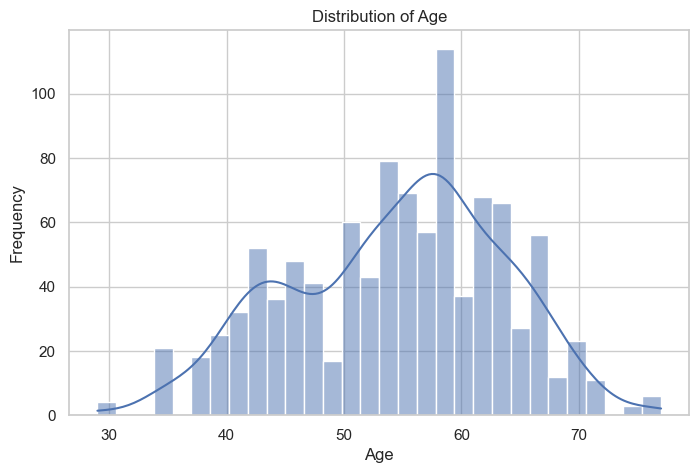

In [16]:
sns.set(style='whitegrid')

# Plot the distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

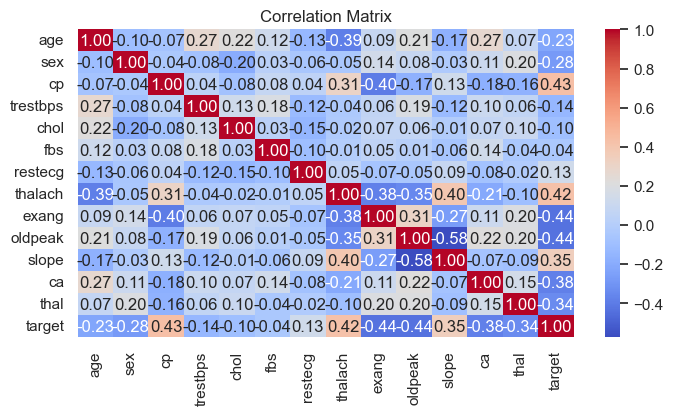

In [17]:
# Plot the correlation matrix
plt.figure(figsize=(8, 4))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Questions to Answer

#### 1. What is the average age of patients with heart disease?
#### 2. Is there a significant difference in cholesterol levels between patients with and without heart disease?
#### 3. What is the distribution of chest pain types among patients with heart disease?
#### 4. How does the maximum heart rate achieved differ between patients with and without heart disease?
#### 5. Is there a correlation between age and maximum heart rate achieved?
#### 6. What is the relationship between resting blood pressure and heart disease?
#### 7. How does the presence of exercise-induced angina relate to heart disease?

### QUESTION 1: What is the average age of patients with heart disease?

In [18]:
avg_age_heart_disease = df[df['target'] == 1]['age'].mean()
print(f"1. The average age of patients with heart disease is: {avg_age_heart_disease:.2f} years")

1. The average age of patients with heart disease is: 52.41 years


### QUESTION 2: Is there a significant difference in cholesterol levels between patients with and without heart disease?

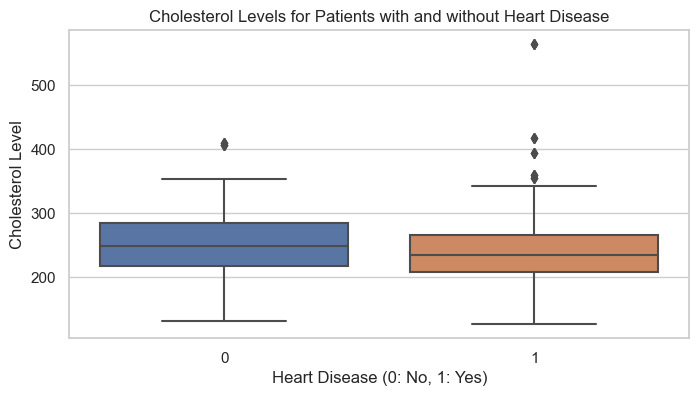

In [19]:
chol_heart_disease = df[df['target'] == 1]['chol']
chol_no_heart_disease = df[df['target'] == 0]['chol']

#plot figure for question 2
plt.figure(figsize=(8, 4))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels for Patients with and without Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Cholesterol Level')
plt.show()

### QUESTION 3: What is the distribution of chest pain types among patients with heart disease?

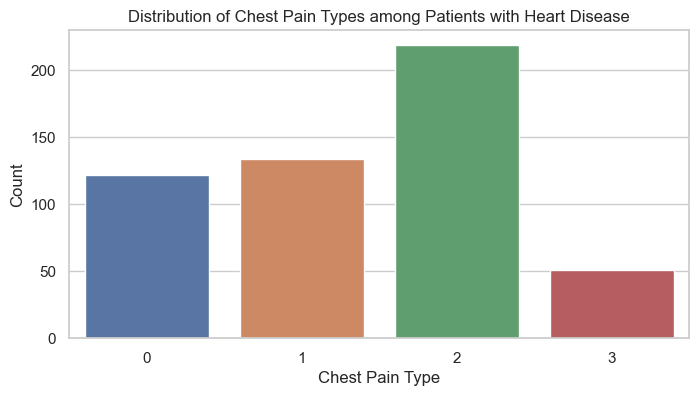

In [20]:
cp_distribution = df[df['target'] == 1]['cp'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.barplot(x=cp_distribution.index, y=cp_distribution.values)
plt.title('Distribution of Chest Pain Types among Patients with Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

### QUESTION 4: How does the maximum heart rate achieved differ between patients with and without heart disease?

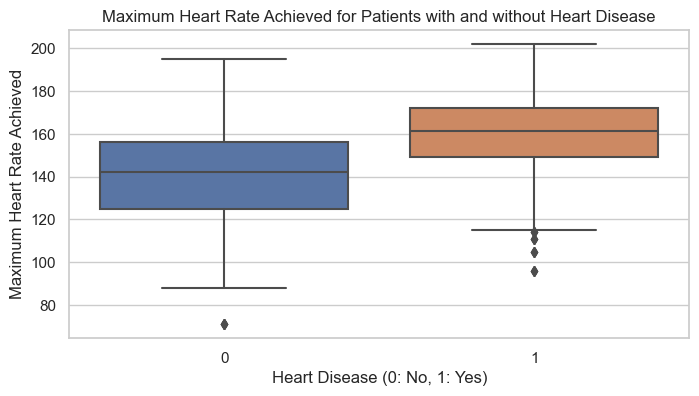

In [21]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Maximum Heart Rate Achieved for Patients with and without Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

### QUESTION 5: Is there a correlation between age and maximum heart rate achieved?

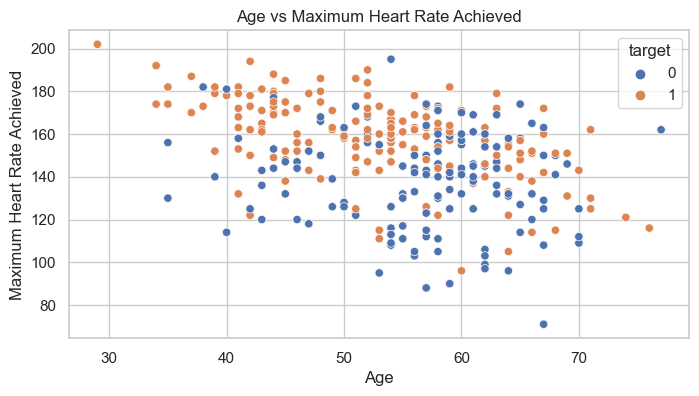

In [22]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='age', y='thalach', hue='target', data=df)
plt.title('Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

### QUESTION 6: What is the relationship between resting blood pressure and heart disease?

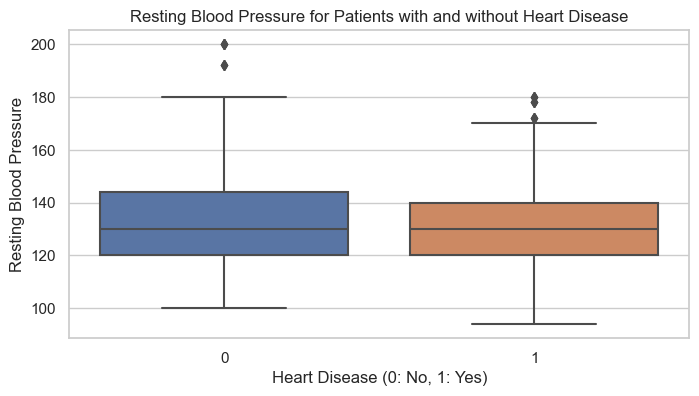

In [23]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure for Patients with and without Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Resting Blood Pressure')
plt.show()

### QUESTION 7: How does the presence of exercise-induced angina relate to heart disease?

In [24]:
angina_heart_disease = df.groupby(['exang', 'target']).size().unstack()
angina_heart_disease_percentage = angina_heart_disease.div(angina_heart_disease.sum(axis=1), axis=0) * 100

<Figure size 800x400 with 0 Axes>

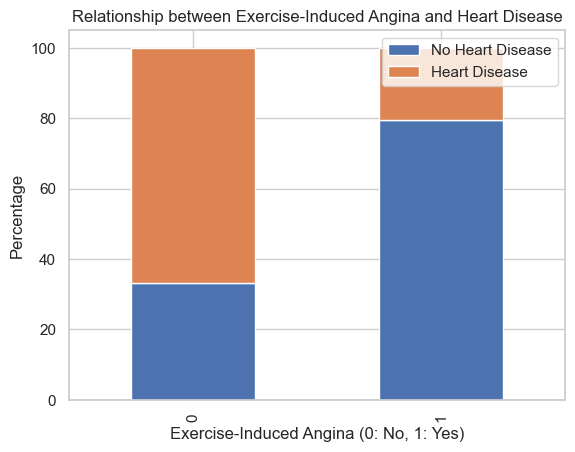

In [25]:
plt.figure(figsize=(8, 4))
angina_heart_disease_percentage.plot(kind='bar', stacked=True)
plt.title('Relationship between Exercise-Induced Angina and Heart Disease')
plt.xlabel('Exercise-Induced Angina (0: No, 1: Yes)')
plt.ylabel('Percentage')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()